## Project description:

Megaline the telecom operator offers its clients two prepaid plans, Surf and Ultimate. 
The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. 
We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. 
Our job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

## Table of contents: 

* [1. Open the data and study the general information](#Step-1.-Open-the-data-and-study-the-general-information)
* [2. Prepare the data](#Step-2.-Prepare-the-data)
    *  [2.1 calls table](#calls-table:)
    *  [2.2 massege-table](#massege-table:)
    *  [2.3 internet table](#internet-table:)
    *  [2.4 plans table](#plans-table:)
* [3. Analyze the data](#Step-3.-Analyze-the-data:)
* [4. Test the hypotheses](#Step-4.-Test--the-hypotheses:)
* [5. Overall coclution](#Step-5.-Overall-coclution:)

## Step 1. Open the data and study the general information

In [83]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import seaborn as sns


In [31]:
# Load the data
try:
     users = pd.read_csv('megaline_users.csv')
except:
    users = pd.read_csv('/datasets/megaline_users.csv')
    
try:
    calls = pd.read_csv("megaline_calls.csv")
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    
try:
    messages = pd.read_csv('megaline_messages.csv')
except:
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    
try:
    internet = pd.read_csv('megaline_internet.csv')
except:
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    
try:
    plans = pd.read_csv('megaline_plans.csv')
except:
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    


## Step 2. Prepare the data

### user table:

The dataset contains the following fields:

- `user_id` - unique user identifier
- `first_name`- user's name
- `last_name`- user's last name
- `age`- user's age (years)
- `reg_date`- subscription date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
- `city` — user's city of residence
- `plan` - calling plan name

In [32]:
print(users.head())
print()
print('*********************************')
print()
users.info()
print()
print('*********************************')
print()
users.describe(include='all').T

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

*********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    obje

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,500.0,NaN,NaN,NaN,1249.5,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
first_name,500,458,Leonila,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,500,399,David,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,500.0,NaN,NaN,NaN,45.486,16.972269,18.0,30.0,46.0,61.0,75.0
city,500,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,500,266,2018-03-08,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan,500,2,surf,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churn_date,34,29,2018-12-18,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print("missing value's at churn_date column in users table:")
print(len(users[users['churn_date'].isnull()==1]))
print("missing value's distribution at churn_date column in users table: {:.2%}".format(len(users[users['churn_date'].isnull()==1])/len(users)))


missing value's at churn_date column in users table:
466
missing value's distribution at churn_date column in users table: 93.20%


#### At the users table: 
By the profile report we can see that there is no duplicates. There's 93.2% wich is 466 cells with empty cells at the churn_date column. 
by the data discription its meen that for those users the calling plan was being used when the data was retrieved
Im going to change those cell imto "unknown".

In [34]:
#filling the missing values at churn_date  column:

users['churn_date'] = users['churn_date'].fillna('unknown')

# cheke if the correction works:
print(len(users[users['churn_date'].isnull()==1]))

0


In [35]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### calls table:

The dataset contains the following fields:
- `id` - unique call identifier
- `call_date`- call date
- `duration`- call duration (in minutes)
- `user_id` - the identifier of the user making the call

In [36]:
print(calls.head())
print()
print('*********************************')
print()
calls.info()
print()
print('*********************************')
print()
calls.describe(include='all').T

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

*********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

*********************************



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,137735,137735,1000_93,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,137735.0,NaN,NaN,NaN,1247.658046,139.416268,1000.0,1128.0,1247.0,1365.0,1499.0
call_date,137735,351,2018-12-27,1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,137735.0,NaN,NaN,NaN,6.745927,5.839241,0.0,1.29,5.98,10.69,37.6


In [37]:
print("zero's at duration column in calls table:")
print(len(calls[calls['duration']==0]))
print("zero's distribution at duration column in calls table: {:.2%}".format(len(calls[calls['duration']==0])/len(calls)))


zero's at duration column in calls table:
26834
zero's distribution at duration column in calls table: 19.48%


In [38]:
#creating new columns for call year, and call month:
calls['year']= pd.DatetimeIndex(calls['call_date']).year
calls['month']= pd.DatetimeIndex(calls['call_date']).month       
print(calls['month'].value_counts())
print(calls['year'].value_counts())

12    30614
11    24651
10    21064
9     16523
8     13590
7     11105
6      8221
5      5959
4      3442
3      1620
2       774
1       172
Name: month, dtype: int64
2018    137735
Name: year, dtype: int64


In [39]:
id_call=calls.groupby('user_id')
print(len(id_call))

481


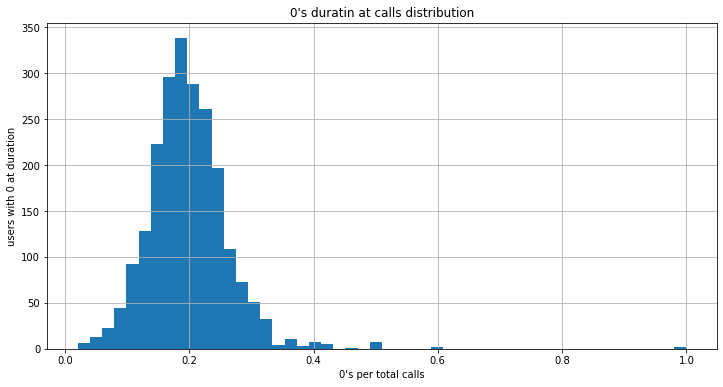

In [40]:
calls_zeros= calls[calls['duration']==0]
calls_dist_table = calls_zeros.groupby(['user_id','month'])['id'].agg('count')/calls.groupby(['user_id','month'])['id'].agg('count')
calls_dist_table= calls_dist_table.reset_index().sort_values(by='id', ascending=False)
not_null_calls_dist_table = calls_dist_table[calls_dist_table['id'].notnull()]

%matplotlib inline

not_null_calls_dist_table.hist('id', bins = 50, figsize=(12,6))

plt.title("0's duratin at calls distribution")
plt.ylabel('users with 0 at duration')
plt.xlabel("0's per total calls")
plt.show()


In [41]:
calls_users_with_no0= calls_dist_table[calls_dist_table['id'].isnull()]
print(len(calls_users_with_no0))

42


In [42]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
 4   year       137735 non-null  int64  
 5   month      137735 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 6.3+ MB


,id,user_id,call_date,duration,year,month
0,1000_93,1000,2018-12-27,8.52,2018,12
1,1000_145,1000,2018-12-27,13.66,2018,12
2,1000_247,1000,2018-12-27,14.48,2018,12
3,1000_309,1000,2018-12-28,5.76,2018,12
4,1000_380,1000,2018-12-30,4.22,2018,12


#### At the calls table: 
* There are 137,735 rows in calls table, with call record of 481 out of 500 users.
* By the profile report we can see that there is no duplicates, and no missing values.
* There's 19.5% which is 26,834 cells with zero's at the duration column.
* From 500 users there is data on 439 users with missed calls.
* From those 26,834, most users have between 10%-30% missing values at the duration coulmn. It can be interpreted as missed calls.


In [43]:
# round up the calls duration:
calls['duration_roundup']= calls['duration'].apply(math.ceil)
# create summ_calls table with number of calls and duration for each user per mounth
summ_calls= calls.groupby(['user_id','month']).agg({'duration_roundup': ['count', 'sum']}).reset_index()
summ_calls.set_axis(['user_id', 'month', 'calls', 'calls_duration'], axis = 'columns', inplace =True)
print(len(summ_calls))
summ_calls.head(2)

2258


,user_id,month,calls,calls_duration
0,1000,12,16,124
1,1001,8,27,182


### massege table: 

The dataset contains the following fields:

- `id` - unique text message identifier
- `message_date` -text message date
- `user_id` -the identifier of the user sending the text

In [44]:
print(messages.head())
print()
print('*********************************')
print()
messages.info()
print()
print('*********************************')
print()
messages.describe(include='all').T
messages.min()

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

*********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

*********************************



id                1000_125
user_id               1000
message_date    2018-01-15
dtype: object

In [45]:
#creating new columns for message year, and message mount:
messages['year']= pd.DatetimeIndex(messages['message_date']).year
messages['month']= pd.DatetimeIndex(messages['message_date']).month       
print(messages['month'].value_counts())
print(messages['year'].value_counts())

12    19071
11    14068
10    12201
9      9227
8      7394
7      5208
6      3833
5      2780
4      1333
3       594
2       259
1        83
Name: month, dtype: int64
2018    76051
Name: year, dtype: int64


#### At the messages table: 
Thers no missing values,and no zero's. 

In [46]:
# create summ_messages table with number of messages for each user per mounth
summ_messages= messages.groupby(['user_id','month'])['id'].count().reset_index()
summ_messages.set_axis(['user_id', 'month', 'messages'], axis = 'columns', inplace =True)
print(len(summ_messages))
summ_messages.head(2)

1806


,user_id,month,messages
0,1000,12,11
1,1001,8,30


### internet table: 

The dataset contains the following fields:

- `id` - unique session identifier
- `mb_used` -the volume of data spent during the session (in megabytes)
- `session_date` -web session date
- `user_id` -user identifier


In [47]:
print(internet.head())
print()
print('*********************************')
print()
internet.info()
print()
print('*********************************')
print()
internet.describe(include='all').T

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

*********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

*********************************



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,104825,104825,1000_13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,104825.0,NaN,NaN,NaN,1242.496361,142.053913,1000.0,1122.0,1236.0,1367.0,1499.0
session_date,104825,351,2018-12-24,851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,104825.0,NaN,NaN,NaN,366.713701,277.170542,0.0,136.08,343.98,554.61,1693.47


In [48]:
internet['year']= pd.DatetimeIndex(internet['session_date']).year
internet['month']= pd.DatetimeIndex(internet['session_date']).month       
print(calls['month'].value_counts())
print(calls['year'].value_counts())

12    30614
11    24651
10    21064
9     16523
8     13590
7     11105
6      8221
5      5959
4      3442
3      1620
2       774
1       172
Name: month, dtype: int64
2018    137735
Name: year, dtype: int64


In [49]:
print("zero's at mb_used column in internet DF:")
print(len(internet[internet['mb_used']==0]))
print("zero's distribution at mb_used column in internet DF: {:.2%}".format(len(internet[internet['mb_used']==0])/len(internet)))


zero's at mb_used column in internet DF:
13747
zero's distribution at mb_used column in internet DF: 13.11%


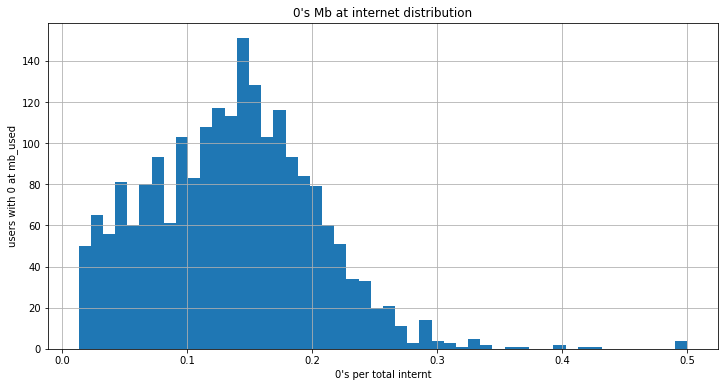

In [51]:
internet_zeros= internet[internet['mb_used']==0]
internet_dist_table = internet_zeros.groupby(['user_id','month'])['id'].agg('count')/internet.groupby(['user_id','month'])['id'].agg('count')
internet_dist_table= internet_dist_table.reset_index().sort_values(by='id', ascending=False)
not_null_internet_dist_table = internet_dist_table[internet_dist_table['id'].notnull()]
%matplotlib inline
not_null_internet_dist_table.hist('id', bins = 50, figsize=(12,6))
plt.title("0's Mb at internet distribution")
plt.ylabel('users with 0 at mb_used')
plt.xlabel("0's per total internt")
plt.show()




In [52]:
internet_users_with_no0= internet_dist_table[internet_dist_table['id'].isnull()]
print(len(internet_users_with_no0))

181


In [53]:
id_internet=internet.groupby('user_id')
print(len(id_internet))

489


In [54]:
#creating new columns for session year, and session mount:
internet['year']= pd.DatetimeIndex(internet['session_date']).year
internet['month']= pd.DatetimeIndex(internet['session_date']).month       
print(internet['month'].value_counts())
print(internet['year'].value_counts())

12    23492
11    18651
10    16193
9     12722
8     10718
7      8110
6      6057
5      4288
4      2558
3      1336
2       604
1        96
Name: month, dtype: int64
2018    104825
Name: year, dtype: int64


In [55]:
internet.head(2)

,id,user_id,session_date,mb_used,year,month
0,1000_13,1000,2018-12-29,89.86,2018,12
1,1000_204,1000,2018-12-31,0.00,2018,12


#### At the internet column:
There are 104,825 rows who represnt data of internt useg for 489 out of 500 users. 
By the profile report we can see that there is no duplicates, and no missing values. 
There's 13.11% wich is 13,747 cells with zero's at the mb_column, who represnt 308 out of 500 users.
From those 13,747, most users have between 2%-25%   missing values at the mb_used coulmn.

I looked for the 65 and older age groups share of the total population is 16%, Im assume the 13.11 of cases can stand for people who didnt use internet at 2018.


In [63]:
# create summ_session table with volume of data for each user per mounth
summ_session= internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
# round up the internet session:
tmp=summ_session['mb_used']/1024 
summ_session['mb_used']= tmp.apply(math.ceil)
summ_session.set_axis(['user_id', 'month', 'gb_used'], axis = 'columns', inplace =True)
print(len(summ_session))
summ_session.head(2)

2277


,user_id,month,gb_used
0,1000,12,2
1,1001,8,7


### plans table:

The dataset contains the following fields:

- `plan_name` - calling plan name
- `usd_monthly_fee` -monthly charge in US dollars
- `minutes_included` -monthly minute allowance
- `messages_included` - monthly text allowance
- `mb_per_month_included` -data volume allowance (in megabytes)
- `usd_per_minute` -price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- `usd_per_message` -price per text after exceeding the package limits
- `usd_per_gb` -price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

In [64]:
print(plans.head())
print()
print('*********************************')
print()
plans.info()
print()
print('*********************************')
print()
plans.describe(include='all').T

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

*********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute     

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
messages_included,2.0,NaN,NaN,NaN,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,NaN,NaN,NaN,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,NaN,NaN,NaN,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
usd_monthly_pay,2.0,NaN,NaN,NaN,45.0,35.355339,20.0,32.5,45.0,57.5,70.0
usd_per_gb,2.0,NaN,NaN,NaN,8.5,2.12132,7.0,7.75,8.5,9.25,10.0
usd_per_message,2.0,NaN,NaN,NaN,0.02,0.014142,0.01,0.015,0.02,0.025,0.03
usd_per_minute,2.0,NaN,NaN,NaN,0.02,0.014142,0.01,0.015,0.02,0.025,0.03
plan_name,2,2,surf,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### creating a merged table:

In [65]:
total1= pd.merge(left = summ_session , 
                right = summ_calls, how='outer',on=['user_id', 'month']).fillna(0)
merge_data=pd.merge(left = total1 , 
                right = summ_messages, how='outer',on=['user_id', 'month']).fillna(0)
merge_data.info()
merge_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   gb_used         2293 non-null   float64
 3   calls           2293 non-null   float64
 4   calls_duration  2293 non-null   float64
 5   messages        2293 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 125.4 KB


,user_id,month,gb_used,calls,calls_duration,messages
0,1000,12,2.0,16.0,124.0,11.0
1,1001,8,7.0,27.0,182.0,30.0
2,1001,9,14.0,49.0,315.0,44.0
3,1001,10,22.0,65.0,393.0,53.0
4,1001,11,19.0,64.0,426.0,36.0


In [66]:
#create plan column in merge_data:
user_plan=dict(zip(users.user_id, users.plan))
merge_data['plan'] = merge_data['user_id']
merge_data = merge_data.replace({'plan': user_plan}) 
merge_data


,user_id,month,gb_used,calls,calls_duration,messages,plan
0,1000,12,2.0,16.0,124.0,11.0,ultimate
1,1001,8,7.0,27.0,182.0,30.0,surf
2,1001,9,14.0,49.0,315.0,44.0,surf
3,1001,10,22.0,65.0,393.0,53.0,surf
4,1001,11,19.0,64.0,426.0,36.0,surf
...,...,...,...,...,...,...,...
2288,1470,11,0.0,81.0,632.0,156.0,surf
2289,1470,12,0.0,78.0,592.0,153.0,surf
2290,1484,11,0.0,2.0,38.0,1.0,surf
2291,1491,4,0.0,8.0,44.0,6.0,surf


In [67]:
# chack if everything ok:
merge_data['plan'].value_counts()

surf        1573
ultimate     720
Name: plan, dtype: int64

In [68]:
# drfine new function to calculate revenue for every row:
def calc_revenue(merge_data):
    plan = merge_data['plan']
    messages = merge_data['messages']
    calls_duration = merge_data['calls_duration']
    gb_used = merge_data['gb_used']
    
    if  plan == 'surf':
        revenue = 20
        if messages > 50:
            revenue += ((messages- 50)*0.003)
        if calls_duration> 500:
            revenue += ((calls_duration- 500)*0.03)
        if gb_used > 15:
            revenue += ((gb_used- 15)*10 )
    elif plan == 'ultimate':
        revenue = 70
        if messages > 1000:
            revenue += ((messages- 1000)*1)
        if calls_duration> 3000:
            revenue += ((calls_duration- 3000)*1)
        if gb_used > 30:
            revenue += ((gb_used- 15)*7 ) 
    return revenue

In [69]:
# create new colume with revenue for every month:
merge_data['revenue']= merge_data.apply(calc_revenue, axis=1) 
# check if everything ok: 
merge_data.info()
merge_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   gb_used         2293 non-null   float64
 3   calls           2293 non-null   float64
 4   calls_duration  2293 non-null   float64
 5   messages        2293 non-null   float64
 6   plan            2293 non-null   object 
 7   revenue         2293 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 161.2+ KB


,user_id,month,gb_used,calls,calls_duration,messages,plan,revenue
0,1000,12,2.0,16.0,124.0,11.0,ultimate,70.000
1,1001,8,7.0,27.0,182.0,30.0,surf,20.000
2,1001,9,14.0,49.0,315.0,44.0,surf,20.000
3,1001,10,22.0,65.0,393.0,53.0,surf,90.009
4,1001,11,19.0,64.0,426.0,36.0,surf,60.000


In [70]:
merge_data.groupby('plan')['revenue'].sum()

plan
surf        95193.343
ultimate    56371.000
Name: revenue, dtype: float64

In [71]:
merge_data['plan'].value_counts()

surf        1573
ultimate     720
Name: plan, dtype: int64

In [72]:
merge_data.groupby('plan')['revenue'].sum()/merge_data['plan'].value_counts()

plan
surf        60.517065
ultimate    78.293056
dtype: float64

obviously ultimate cost more, but surf brings larger revenue.  

## Step 3. Analyze the data:

In [73]:
#surf users:
surf_users = merge_data.query('plan == "surf"')

# ultimate users:
ultimate_users = merge_data.query('plan == "ultimate"')

C:\Users\evyatar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\evyatar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


surf minutes mean:  428.7495232040687
surf minutes variance:  54933.334591317405
surf minutes standard deviation:  234.3786137669506
most data can be found in this range:  (-274.3863180967831, 1131.8853645049205)

ultimate minutes mean:  430.45
ultimate minutes variance:  57764.12527777776
ultimate minutes standard deviation:  234.3786137669506
most data can be found in this range:  (-272.6858413008518, 1133.5858413008518)


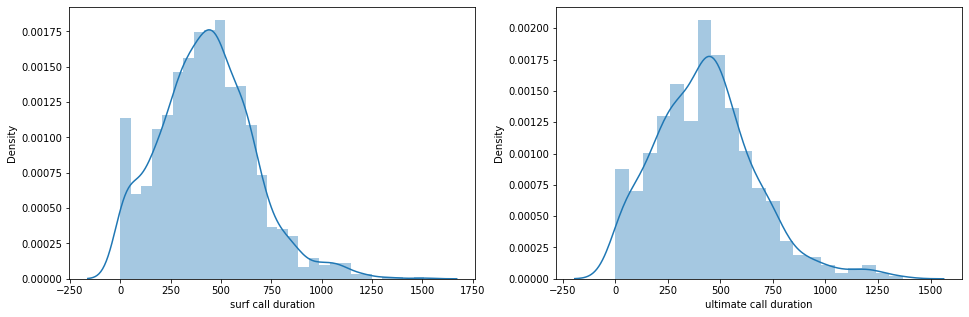

In [96]:
# Create one row with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Create a histogram for the surf plan
sns.distplot(surf_users['calls_duration'],ax=axes[0], axlabel ='surf call duration')

# Create a histogram for the second plan
sns.distplot(ultimate_users['calls_duration'], ax=axes[1], axlabel ='ultimate call duration')

# surf minutes: 
surf_minutes_mean =  surf_users['calls_duration'].mean()
surf_minutes_variance = np.var(surf_users['calls_duration'])
surf_minutes_std = np.sqrt(surf_minutes_variance)

print('surf minutes mean: ', surf_minutes_mean)
print('surf minutes variance: ', surf_minutes_variance)
print( 'surf minutes standard deviation: ', surf_minutes_std)
print('most data can be found in this range: ', 
      (surf_minutes_mean- 3*surf_minutes_std, surf_minutes_mean + 3*surf_minutes_std))
print()
# ultimate minutes: 
ultimate_minutes_mean =  ultimate_users['calls_duration'].mean()
ultimate_minutes_variance = np.var(ultimate_users['calls_duration'])
ultimate_minutes_std = np.sqrt(surf_minutes_variance)

print('ultimate minutes mean: ', ultimate_minutes_mean)
print('ultimate minutes variance: ', ultimate_minutes_variance)
print('ultimate minutes standard deviation: ', ultimate_minutes_std)
print('most data can be found in this range: ', 
      (ultimate_minutes_mean- 3*ultimate_minutes_std, ultimate_minutes_mean + 3*ultimate_minutes_std))


 by comparing between calls distribution for "surf" and "ultimate" plans, we can se that two groups acting similarly, 
 the mean and standard diviation almost the same, the "ultimate" plan has slightly higher value.

surf messages mean:  31.15956770502225
surf messages variance:  1126.0082317266638
surf messages standard deviation:  33.556046127734774
most data can be found in this range:  (-69.50857067818207, 131.82770608822656)

ultimate messages mean:  37.55138888888889
ultimate messages variance:  1207.0779147376504
ultimate messages standard deviation:  34.74302685054442
most data can be found in this range:  (-66.67769166274437, 141.78046944052213)


C:\Users\evyatar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\evyatar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


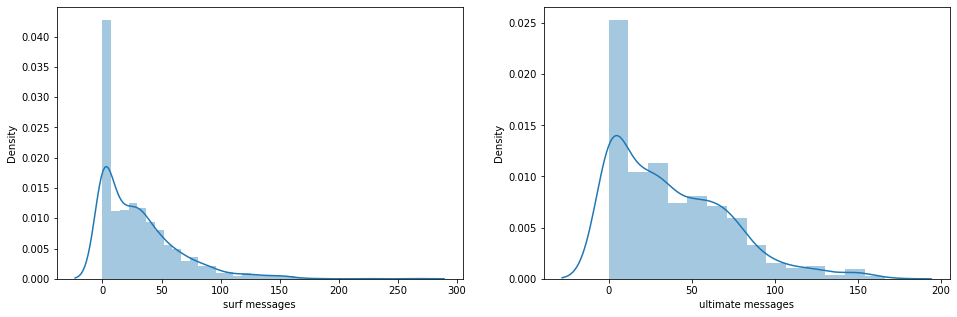

In [97]:
# Create one row with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Create a histogram for the surf plan
sns.distplot(surf_users['messages'],ax=axes[0], axlabel ='surf messages')

# Create a histogram for the second plan
sns.distplot(ultimate_users['messages'], ax=axes[1], axlabel ='ultimate messages')

# surf text: 
surf_messages_mean =  surf_users['messages'].mean()
surf_messages_variance = np.var(surf_users['messages'])
surf_messages_std = np.sqrt(surf_messages_variance)

print('surf messages mean: ', surf_messages_mean)
print('surf messages variance: ', surf_messages_variance)
print( 'surf messages standard deviation: ', surf_messages_std)
print('most data can be found in this range: ', 
      (surf_messages_mean- 3*surf_messages_std, surf_messages_mean + 3*surf_messages_std))
print()
# ultimate text:
ultimate_messages_mean =  ultimate_users['messages'].mean()
ultimate_messages_variance = np.var(ultimate_users['messages'])
ultimate_messages_std = np.sqrt(ultimate_messages_variance)

print('ultimate messages mean: ', ultimate_messages_mean)
print('ultimate messages variance: ', ultimate_messages_variance)
print('ultimate messages standard deviation: ', ultimate_messages_std)
print('most data can be found in this range: ', 
      (ultimate_messages_mean- 3*ultimate_messages_std, ultimate_messages_mean + 3*ultimate_messages_std))

plans

 by comparing between massages distribution for "surf" and "ultimate" plans, we can se that two groups acting similarly, 
 the mean and standard diviation have slightly higher value for the "ultimate" plan.

surf internet volume mean:  16.670692943420217
surf internet volume variance:  61.54444942447026
surf internet volume standard deviation:  7.845027050588816
most data can be found in this range:  (-6.864388208346231, 40.20577409518667)

ultimate internet volume mean:  17.306944444444444
ultimate internet volume variance:  58.748840663580125
ultimate internet volume standard deviation:  7.66477923123557
most data can be found in this range:  (-5.687393249262264, 40.30128213815115)


C:\Users\evyatar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\evyatar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


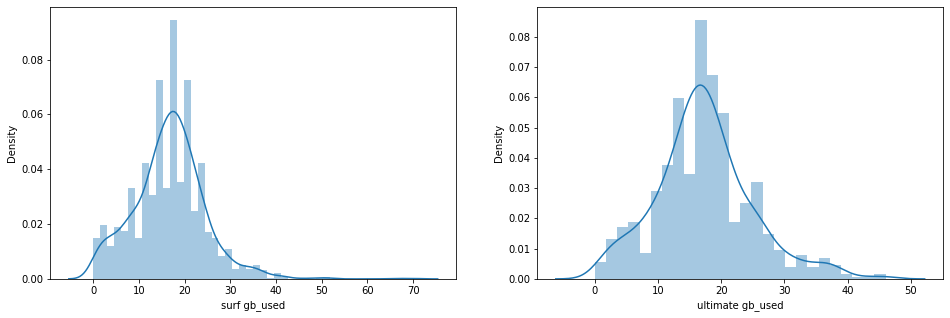

In [98]:
# Create one row with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Create a histogram for the surf plan
sns.distplot(surf_users['gb_used'],ax=axes[0], axlabel ='surf gb_used')

# Create a histogram for the second plan
sns.distplot(ultimate_users['gb_used'], ax=axes[1], axlabel ='ultimate gb_used')

# surf internet: 
surf_internet_mean =  surf_users['gb_used'].mean()
surf_internet_variance = np.var(surf_users['gb_used'])
surf_internet_std = np.sqrt(surf_internet_variance)

print('surf internet volume mean: ', surf_internet_mean)
print('surf internet volume variance: ', surf_internet_variance)
print( 'surf internet volume standard deviation: ', surf_internet_std)
print('most data can be found in this range: ', 
      (surf_internet_mean- 3*surf_internet_std, surf_internet_mean + 3*surf_internet_std))
print()
# ultimate internet:
ultimate_internet_mean =  ultimate_users['gb_used'].mean()
ultimate_internet_variance = np.var(ultimate_users['gb_used'])
ultimate_internet_std = np.sqrt(ultimate_internet_variance)

print('ultimate internet volume mean: ', ultimate_internet_mean)
print('ultimate internet volume variance: ', ultimate_internet_variance)
print('ultimate internet volume standard deviation: ', ultimate_internet_std)
print('most data can be found in this range: ', 
      (ultimate_internet_mean- 3*ultimate_internet_std, ultimate_internet_mean + 3*ultimate_internet_std))

plans

 by comparing between massages distribution for "surf" and "ultimate" plans, we can se that two groups acting similarly, 
 the mean and standard diviation have slightly higher value for the "ultimate" plan.

## Step 4. Test  the hypotheses:

####  h0: the revenue from "surf" and "ultimate" are similar
#### h1 the revenue from "surf and "ultimate are not similar

In [41]:
surf_revenue_mean = surf_users['revenue'].mean()
surf_revenue_variance = np.var(surf_users['revenue'])
surf_revenue_std =  np.sqrt(surf_revenue_variance)
print('surf_revenue mean: ', surf_revenue_mean)
print('surf_revenue variance: ', surf_revenue_variance)
print('surf_revenue standard deviation: ', surf_revenue_std)
print('most data can be found in this range: ', 
      (surf_revenue_mean- 3*surf_revenue_std, surf_revenue_mean + 3*surf_revenue_std))
print()
ultimate_revenue_mean = ultimate_users['revenue'].mean()
ultimate_revenue_variance = np.var(ultimate_users['revenue'])
ultimate_revenue_std =  np.sqrt(ultimate_revenue_variance)
print('ultimate revenue mean: ', ultimate_revenue_mean)
print('ultimate revenue variance: ', ultimate_revenue_variance)
print('ultimate revenue standard deviation: ', ultimate_revenue_std)
print('most data can be found in this range: ', 
      (ultimate_revenue_mean- 3*ultimate_revenue_std, ultimate_revenue_mean + 3*ultimate_revenue_std))
print()
st.levene(surf_users['revenue'], ultimate_users['revenue'], center ='mean')

surf_revenue mean:  58.85767196439923
surf_revenue variance:  2972.4215304353042
surf_revenue standard deviation:  54.51991865763653
most data can be found in this range:  (-104.70208400851035, 222.41742793730882)

ultimate revenue mean:  78.29305555555555
ultimate revenue variance:  1179.976618441358
ultimate revenue standard deviation:  34.35078774120556
most data can be found in this range:  (-24.759307668061126, 181.34541877917223)



LeveneResult(statistic=218.86584219221655, pvalue=2.284223282972945e-47)

lets take a look at the two data sets,  the mean and the varience are different the P-value by the LeveneResult is realy small that an indicate to the diffrent betweem surf and ultimate groups.
lets assume that the to groups are similar:

In [42]:
# h0: the revnue from "surf" and "ultimate" are similar:
alpha = 0.05 
result1 = st.ttest_ind(surf_users['revenue'],
                      ultimate_users['revenue'], equal_var = False)
# equal_var = False because P value by the LeveneResult is really small

print ('p-value: ', result1.pvalue)


if result1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
print('surf_revenue mean: ', surf_revenue_mean)
print('ultimate revenue mean: ', ultimate_revenue_mean)


p-value:  1.7805358989844033e-24
We reject the null hypothesis
surf_revenue mean:  58.85767196439923
ultimate revenue mean:  78.29305555555555


we rject the null hypothesis, the two groups are different, they have differnt values.

#### h0: the revenue from NY-NJ areas is similar to revenue from other regions: 

In [43]:
#create city column in merge_data:
user_city =dict(zip(users.user_id, users.city))
merge_data['city'] = merge_data['user_id']
merge_data = merge_data.replace({'city': user_city}) 
merge_data.head(2)

,user_id,month,gb_used,calls,calls_duration,messages,plan,revenue,city
0,1000,12,2.0,16.0,124.0,11.0,ultimate,70.0,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,7.0,27.0,182.0,30.0,surf,20.0,"Seattle-Tacoma-Bellevue, WA MSA"


In [44]:
ny_nj_users = merge_data[merge_data['city'].str.contains("NY-NJ")]
print(ny_nj_users['city'].value_counts())
print("*************")
other_users = merge_data[~merge_data['city'].str.contains("NY-NJ")]
print(other_users['city'].value_counts())

New York-Newark-Jersey City, NY-NJ-PA MSA    377
Name: city, dtype: int64
*************
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 88
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
Boston-Cambridge-Newton, MA-NH MSA                  70
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
El Paso, TX MSA                                      2
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 72, dtype: int64


In [45]:
ny_nj_revenue_mean = ny_nj_users['revenue'].mean()
ny_nj_revenue_variance = np.var(ny_nj_users['revenue'])
ny_nj_revenue_std =  np.sqrt(ny_nj_revenue_variance)
print('ny_nj revenue mean: ', ny_nj_revenue_mean)
print('ny_nj revenue variance: ', ny_nj_revenue_variance)
print('ny_nj revenue standard deviation: ', ny_nj_revenue_std)
print('most data can be found in this range: ', 
      (ny_nj_revenue_mean- 3*ny_nj_revenue_std, ny_nj_revenue_mean + 3*ny_nj_revenue_std))
print()
other_revenue_mean = other_users['revenue'].mean()
other_revenue_variance = np.var(other_users['revenue'])
other_revenue_std =  np.sqrt(other_revenue_variance)
print('other revenue mean: ', other_revenue_mean)
print('other revenue variance: ', other_revenue_variance)
print('other revenue standard deviation: ', other_revenue_std)
print('most data can be found in this range: ', 
      (other_revenue_mean- 3*other_revenue_std, other_revenue_mean + 3*other_revenue_std))
print()
st.levene(ny_nj_users['revenue'], other_users['revenue'], center ='mean')

ny_nj revenue mean:  61.14279840848806
ny_nj revenue variance:  2350.148762760422
ny_nj revenue standard deviation:  48.47833292059889
most data can be found in this range:  (-84.2922003533086, 206.57779717028473)

other revenue mean:  65.71152557411273
other revenue variance:  2515.2356024153164
other revenue standard deviation:  50.1521246051981
most data can be found in this range:  (-84.74484824148158, 216.16789938970703)



LeveneResult(statistic=3.276907835504723, pvalue=0.0703921579039499)

* lets take a look at the two data sets,  the mean and the varience are not so different, 
* the P-value by the LeveneResult is realy big that an indicate  that there is no diffrent betweem NY-NJ and  other areas.
* lets assume that the two groups are similar:

In [46]:
# h0: the revnue from "NY-NJ" and "other" are similar:
alpha = 0.05 
result1 = st.ttest_ind(ny_nj_users['revenue'],
                      other_users['revenue'], equal_var = True)

print ('p-value: ', result1.pvalue)


if result1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
print('ny_nj revenue mean: ', ny_nj_revenue_mean)
print('other regions revenue mean: ', other_revenue_mean)

p-value:  0.10431170042638659
We can't reject the null hypothesis
ny_nj revenue mean:  61.14279840848806
other regions revenue mean:  65.71152557411273


* we can't reject the null hypothesis, 
* the two groups are from the same data base. 
* its make sense that those two groups have similar mean and varience.

## Step 5. Overall coclution:

we got 5 data frams with data on 500 users,
initialy I tried the understand the data, I used profile report to find missing values or duplicated rows, since profile report doesn't work on pracricum platform, I areas those lines but left the comments.
In the calls and internt values there were cell with zeros, I decided to leave those line without changes, it possible that thos row represnt misset call or times when people didn't use the internet.

I created a merged table with the user id, date, calls, masseges, intenet volume, , city, and revenue.
From that table I ploted histogram to see the diffrent between surf and ultimate plans, the distributiomn  looked similar for both plans, with higher valuse for ultimate, wich make sens.

At last I chacked the null hypothesis:
1. The average revenue from users of Ultimate and Surf calling plans differs.
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.
I rephrase the hypothesis:
1. The average revenue from users of Ultimate and Surf calling plans are the same 
2. The average revenue from users in NY-NJ area is the same from that of the users from other regions.
I found the mean and the varience for each group to see if they have similare distribution, and then used T-test.

The first hypothesis was rejected,  the surf users diffrent from the ultimate users, its not the same databased
The seconde  hypothesis was true, the NY-NJ users act like the rest of the users, wich make sense, both are from the same databased. 
